In [1]:
include("ChaosFunctions.jl")
using Plots
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

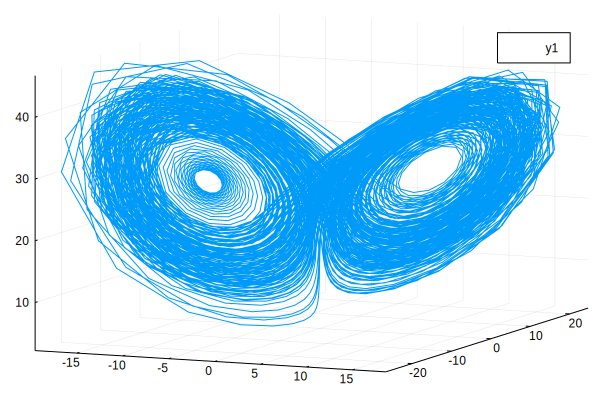

In [2]:
z=lorenzpoints(5000,0.05)
plot(z[1,:],z[2,:],z[3,:])

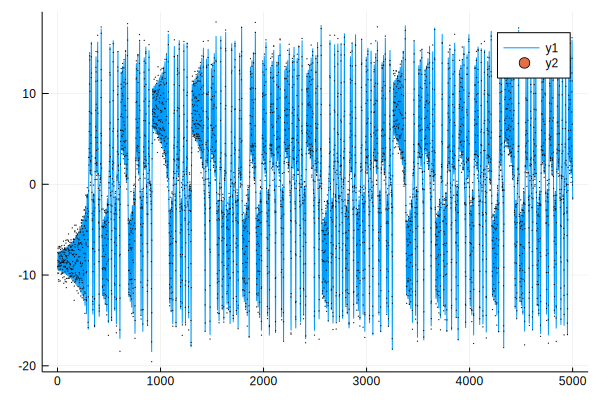

In [3]:
zn=addnoise(z,0.05)
plot(z[1,:])
plot!(zn[1,:],linetype=:dots,markersize=0.5)

In [4]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

In [28]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat,sigmoid),
    "embedding" => Place.vembed([0,1,3,6,9,12,18,24]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nbasis" => 5000,
    "nneighbours"=> 1
    )

Dict{String,Any} with 7 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "nbasis"      => 5000
  "embedding"   => ([0], [1], [0, 1], [3], [0, 3], [1, 3], [0, 1, 3], [6], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat, sigmoid)
  "nneighbours" => 1

dx=25, nx=4477
needδ=true
*MSS=5.257338378823964 DL=10071.649066820633 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.819124266356085 DL=9361.226819461726 size=2
*MSS=3.5395651633816154 DL=9196.734932183515 size=3
*MSS=3.495915069159168 DL=9174.777714163207 size=4
*MSS=3.4593484929857805 DL=9157.322449996002 size=5
*MSS=2.994607270386244 DL=8834.012297094665 size=5
*MSS=2.9757534832494503 DL=8825.831482885531 size=6
*MSS=2.9165845733715 DL=8780.85312310838 size=6
*MSS=2.5573777624632483 DL=8484.69928056043 size=6
MSS=2.5526202697329152 DL=8486.949203788483 size=7
*MSS=2.0928946868425355 DL=8043.602486037399 size=7
MSS=2.0903782144432905 DL=8047.402357660443 size=8
MSS=2.088419861739059 DL=8051.663717662648 size=9
MSS=2.087780264733068 DL=8057.535121731755 size=10
MSS=2.0888561916313186 DL=8058.717966992496 size=10
MSS=2.0864882344489155 DL=8062.47747727602 size=11
MSS=2.0878918797463553 DL=8063.81435250261 size=11
MSS=2.085193081197123 DL=8067.065354280887 s

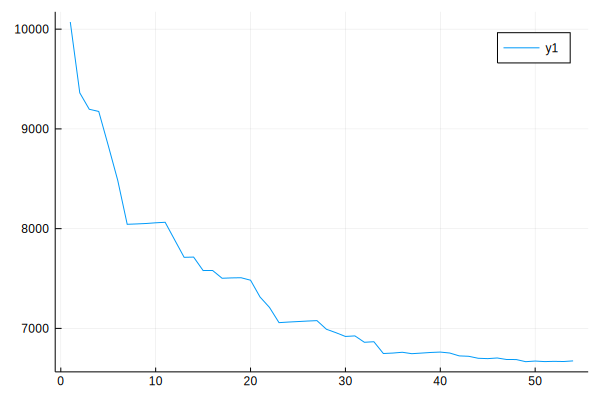

In [29]:
yn=zn[1,:]
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)
plot(mdlv)

First, build the model

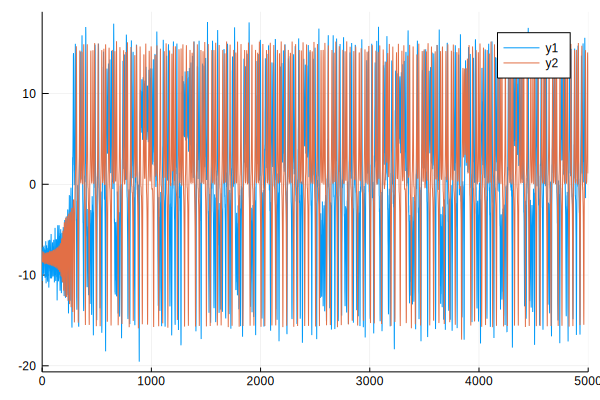

In [30]:
yp, yt = Place.freerun(mymodel,yn,5000)
plot(yt)
plot!(yp,xlimit=(0,5000))

In [31]:
mymodel

Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [1], 4.573167828113603, [-15.082491014516291 5.9033493247494295 … -10.500369243381002 -0.7560543946431177], [2.4489624492749984]), Main.Place.BasisFunc(sigmoid, [0], 2.751311549344088, [-17.05556374117328 8.36921388115312 … -12.291359037749814 -3.4933758572472264], Any[]), Main.Place.BasisFunc(tophat, [0, 9], 8.459608645876132, [-17.05556374117328 8.36921388115312 … -12.291359037749814 -3.4933758572472264; -1.467861240882678 9.479708743674284 … -5.4980485148956335 -14.53880397879795], [4.978142583536437]), Main.Place.BasisFunc(tophat, [3], 3.401603530606399, [-7.160802868570591 3.506972185347023 … -7.016265149032993 -2.736355865779703], [2.870061721902304]), Main.Place.BasisFunc(tophat, [9], 6.820723848764136, [-1.467861240882678 9.479708743674284 … -5.4980485148956335 -14.53880397879795], [4.545687335951406]), Main.Place.BasisFunc(tophat, [1, 3, 6, 9, 18], 11.154207143500443, [-15.082491014516291 5.903349324749429

Assuming we want to use yn as the trajectory, and the closest basis functions from mymodel to map to nodes in the network, we first need to construct an embedding of yn in the appropriate embedding dimension - which is determined by mymodel.embedv

In [32]:
X,z,Xp,zp=Place.embedding(yn,mymodel.embedv)

([-9.03983022292426 -10.649385140951292 … -0.07605629939385672 0.26950287009732277; -8.966532340900761 -9.03983022292426 … 2.0073528217734227 -0.07605629939385672; … ; -9.785616674898481 -7.521355947410914 … 11.375967032769136 13.672201364027908; -9.088081369101964 -9.785616674898481 … 8.853697200827137 11.375967032769136], [-10.649385140951292, -9.35089555786708, -8.694524491565078, -8.668674932017135, -7.186846286147634, -7.5384929651708035, -6.9013803304200225, -8.957739803129694, -7.913913551141699, -7.787878475256974  …  10.173111243691896, 12.257540577999631, 16.139087810897713, 13.889235210553103, 11.386844935273452, 6.6133521632191385, 2.0073528217734227, -0.07605629939385672, 0.26950287009732277, -1.5288879497410601], Any[], Any[])

In [33]:
size(X)

(25, 4976)

In [34]:
size(mymodel.rbf)

(30,)

To see which basis function centre is closest to each embedded time point, we simply evaluate the embedded points at every basis function - for Gaussian (and tophat) basis functions that are monotonically decreasing this will give us a handy measure of "distance" from each centre, normalised by radius. Even for other non-monotonic basis functions this is probably a reasonable generalisation. Probably handy to assume that the maximum at 0 is the same across all basis functions. 

Anyway, evaluate the data at all the basis functions...

In [35]:
ϕ,offset = Place.placebo(X,mymodel.rbf,false,false)

([1.5993878205955702e-8 0.994122602642801 … 3.705479717549352e-10 2.2170262378171894e-13; 1.2867863276169141e-8 0.9811854102943488 … 1.5614062196810764e-9 6.6908253148099714e-9; … ; 0.508957047735779 0.9999912783596853 … 0.00652939740413591 0.9996199948640538; 0.1454050171783423 0.9999932156917116 … 0.015514594552655562 0.9872739713134314], 0)

And then find the maximal ones (this technique will not handle ties, but lets assume that that is not a problem for now...)

In [36]:
indx=argmax(ϕ,dims=2)
nodes=[i[2] for i in indx]

4976×1 Array{Int64,2}:
 23
 23
 23
 23
 23
 23
 23
 23
 23
 23
 23
 23
 23
  ⋮
 23
  2
  2
  2
  2
  2
  2
  2
  2
  2
 24
 23

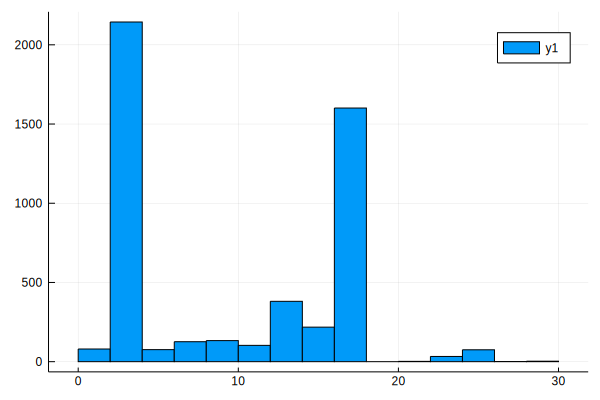

In [72]:
histogram(nodes)#,bins=1:1:40)

Now we just need to build a network from this node sequence...

In [20]:
using LightGraphs, SimpleWeightedGraphs, GraphPlot

In [38]:
g=SimpleWeightedDiGraph(length(mymodel.rbf))

{30, 0} directed simple Int64 graph with Float64 weights

In [39]:
nd=length(nodes)
for i in 2:nd
    add_edge!(g,nodes[i-1],nodes[i],weights(g)[nodes[i-1],nodes[i]]+1)
end

In [40]:
A=Array(g.weights)

30×30 Array{Float64,2}:
 0.0     3.0  0.0  0.0    0.0  0.0  …   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 5.0  1417.0  0.0  0.0   59.0  0.0     84.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  1.0  0.0    6.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  0.0  0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    17.0  9.0  0.0  165.0  0.0     29.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  0.0  0.0    0.0  0.0  …   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  0.0  0.0    1.0  0.0      1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    46.0  0.0  0.0   14.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  0.0  0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     2.0  0.0  0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    10.0  0.0  0.0   36.0  0.0  …  10.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    11.0  0.0  1.0    7.0  0.0      1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0     0.0  0.0  0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮            

In [41]:
am=A+A'
pg=Graph(am)
pgi=connected_components(pg)[1]


15-element Array{Int64,1}:
  1
  2
  3
  4
  5
  7
  8
 10
 11
 12
 15
 18
 20
 23
 24

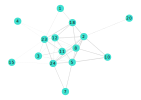

In [42]:
plt2=gplot(pg[pgi],nodelabel=pgi,edgelinewidth=log.(am[am.>0]).+1) #not sure that the weights are in the right order...

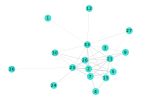

In [27]:
plt1

In [47]:
nnets=20
plt=Array{Any,1}(undef,nnets)
for i in 1:1:nnets
    mymodel, X, zout, mdlv = Place.buildmodel(yn,options)
    X,z,Xp,zp=Place.embedding(yn,mymodel.embedv)
    ϕ,offset = Place.placebo(X,mymodel.rbf,false,false)
    indx=argmax(ϕ,dims=2)
    nodes=[i[2] for i in indx]
    g=SimpleWeightedDiGraph(length(mymodel.rbf))
    nd=length(nodes)
    for i in 2:nd
        add_edge!(g,nodes[i-1],nodes[i],weights(g)[nodes[i-1],nodes[i]]+1)
    end
    A=Array(g.weights)
    am=A+A'
    pg=Graph(am)
    pgi=connected_components(pg)[1]
    plt[i]=gplot(pg[pgi],nodelabel=pgi,edgelinewidth=log.(am[am.>0]).+1)
end

dx=25, nx=4477
needδ=true
*MSS=5.257338378823964 DL=10071.649066820633 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.819124266356085 DL=9361.226819461726 size=2
*MSS=3.5395651633816154 DL=9196.734932183515 size=3
*MSS=3.495915069159168 DL=9174.777714163207 size=4
*MSS=3.4593484929857805 DL=9157.322449996002 size=5
*MSS=2.994607270386244 DL=8834.012297094665 size=5
*MSS=2.9757534832494503 DL=8825.831482885531 size=6
*MSS=2.9165845733715 DL=8780.85312310838 size=6
MSS=2.914112337083568 DL=8786.070415460066 size=7
*MSS=2.8689872346374536 DL=8750.409785307718 size=7
MSS=2.86834397244662 DL=8756.3127013172 size=8
MSS=2.867642306245014 DL=8762.33532664539 size=9
*MSS=2.791213072422298 DL=8699.437566042738 size=9
*MSS=2.1555928428470303 DL=8124.04849266344 size=9
MSS=2.1547051977950984 DL=8129.779004638642 size=10
*MSS=2.045397964787965 DL=8010.951415510235 size=10
MSS=2.0444864489526506 DL=8016.635652717113 size=11
MSS=2.0441043347705334 DL=8015.830638942888 size

MSS=2.914112337083568 DL=8786.070415460066 size=7
*MSS=2.8689872346374536 DL=8750.409785307718 size=7
*MSS=2.6760611061965847 DL=8591.628717970398 size=7
*MSS=2.4939240134534453 DL=8432.788697042975 size=7
*MSS=2.4803746001819817 DL=8426.791569380122 size=8
MSS=2.479030260338072 DL=8432.2709329651 size=9
MSS=2.4783738068594117 DL=8438.371032570994 size=10
MSS=2.4767897782939055 DL=8436.270613249677 size=10
*MSS=1.925557834578988 DL=7875.762062298641 size=10
MSS=1.9241826271463212 DL=7880.768855276313 size=11
*MSS=1.8956326454681032 DL=7846.147622625797 size=11
MSS=1.8941454162812992 DL=7850.726587685872 size=12
MSS=1.8932773740617763 DL=7856.1217010645 size=13
MSS=1.8928266544851788 DL=7855.737816406932 size=13
MSS=1.8920699595272144 DL=7861.3998222008795 size=14
*MSS=1.64313446693206 DL=7545.719131780825 size=14
MSS=1.6422736888034262 DL=7551.300616574023 size=15
MSS=1.6395287406741532 DL=7546.684318728612 size=15
MSS=1.6381695878211415 DL=7551.110071520655 size=16
*MSS=1.635165759654

*MSS=2.9165845733715 DL=8780.85312310838 size=6
MSS=2.914112337083568 DL=8786.070415460066 size=7
*MSS=2.8689872346374536 DL=8750.409785307718 size=7
*MSS=2.7739932491306587 DL=8672.457466175985 size=7
*MSS=2.5099848924940957 DL=8448.34558728622 size=7
MSS=2.5037212019646002 DL=8448.950139942188 size=8
MSS=2.5026356911762258 DL=8454.672346294998 size=9
*MSS=2.3779765093164396 DL=8339.224097520535 size=9
*MSS=2.3738628978648713 DL=8335.212541223596 size=9
MSS=2.372924354022147 DL=8340.86808082717 size=10
*MSS=1.793381081179127 DL=7719.194917450904 size=10
*MSS=1.7870037870247877 DL=7710.1440593962225 size=10
MSS=1.784661496036662 DL=7713.64246563552 size=11
*MSS=1.762803482537617 DL=7685.477963162587 size=11
MSS=1.7604992954473668 DL=7689.307042390451 size=12
*MSS=1.756395279149937 DL=7683.829395856301 size=12
MSS=1.7542550979598608 DL=7687.6703866490225 size=13
*MSS=1.7039557474468867 DL=7618.891729660045 size=13
*MSS=1.7029925723596826 DL=7617.411703888632 size=13
*MSS=1.7026541745464

MSS=2.914112337083568 DL=8786.070415460066 size=7
*MSS=2.8689872346374536 DL=8750.409785307718 size=7
*MSS=2.724269288605393 DL=8632.104137302244 size=7
*MSS=1.8542013799014634 DL=7773.773286930937 size=7
MSS=1.8525230393208665 DL=7778.3164622498225 size=8
MSS=1.8496041587306649 DL=7781.021158765227 size=9
MSS=1.8491779407380662 DL=7787.309950088004 size=10
*MSS=1.828061265097374 DL=7761.512884594059 size=10
MSS=1.8275949669970926 DL=7768.034571770024 size=11
MSS=1.8267140097392998 DL=7773.1552983596675 size=12
*MSS=1.758939013452487 DL=7686.025098328322 size=12
MSS=1.7583595808643049 DL=7691.610234489388 size=13
*MSS=1.7161619798145047 DL=7635.870242002781 size=13
MSS=1.7157573891174764 DL=7642.0614864791805 size=14
MSS=1.7155329050415218 DL=7641.387941039359 size=14
MSS=1.7128953527026562 DL=7636.763286973535 size=14
MSS=1.7124454960753794 DL=7642.780097874713 size=15
MSS=1.7127355986560029 DL=7643.047540018362 size=15
MSS=1.7116914543264454 DL=7647.717067383986 size=16
*MSS=1.686456

*MSS=1.012594407758666 DL=6654.516213874777 size=49
MSS=1.0125284124754292 DL=6661.137990588982 size=50
MSS=1.0124753302580793 DL=6667.4387187516095 size=51
*MSS=1.0062714685750602 DL=6653.673200460006 size=51
*MSS=1.0060215759124216 DL=6653.586551768746 size=51
*MSS=1.0059805893456837 DL=6653.034404898617 size=51
*MSS=1.0030350524144898 DL=6643.462032325272 size=51
MSS=1.00297358316662 DL=6650.7241453368715 size=52
*MSS=0.9892995311404543 DL=6622.0405893122215 size=52
*MSS=0.9892972976721424 DL=6621.683436707924 size=52
MSS=0.9892119044578703 DL=6627.954164894766 size=53
MSS=0.987900006079282 DL=6624.132089650249 size=53
*MSS=0.9672186079599214 DL=6577.507665395678 size=53
MSS=0.9671801099153805 DL=6578.2166036670615 size=53
*MSS=0.9671255813942626 DL=6577.102915054053 size=53
*MSS=0.9624031538612948 DL=6566.441337077353 size=53
*MSS=0.9623174710917466 DL=6566.062950048036 size=53
MSS=0.9622507826309306 DL=6573.214295765812 size=54
MSS=0.9622069313814311 DL=6579.284951605226 size=55
M

MSS=1.1935052884557196 DL=6934.747722210226 size=34
*MSS=1.1937056068983156 DL=6934.535952111342 size=34
MSS=1.1929682599496374 DL=6939.5640534484155 size=35
MSS=1.1928903953597434 DL=6946.1108811862805 size=36
MSS=1.192783834353342 DL=6946.041263005215 size=36
MSS=1.192694227109382 DL=6952.03381296676 size=37
*MSS=1.1532867107703753 DL=6876.896076158778 size=37
*MSS=1.1528453599501196 DL=6876.6502911582165 size=37
*MSS=1.1386949412934524 DL=6849.060345062124 size=37
*MSS=1.1384381838716313 DL=6848.865857713109 size=37
MSS=1.1386720296356978 DL=6849.728974459151 size=37
MSS=1.1381915443418629 DL=6854.237552890699 size=38
MSS=1.1380210746340356 DL=6854.19189685008 size=38
*MSS=1.1299036097851485 DL=6835.658693543649 size=38
MSS=1.1294515248056538 DL=6842.0015525038325 size=39
*MSS=1.1240673503407368 DL=6830.668465998821 size=39
MSS=1.1236535365547515 DL=6836.527591392432 size=40
MSS=1.123459827574963 DL=6842.528369793189 size=41
MSS=1.1233330741455556 DL=6848.825401376017 size=42
MSS=1.

*MSS=1.0936156308354392 DL=6830.170853978382 size=49
MSS=1.0934514774722686 DL=6836.421438824582 size=50
MSS=1.0934469489081848 DL=6836.060069083551 size=50
MSS=1.0932952031606873 DL=6842.488204529285 size=51
MSS=1.0881647205440146 DL=6831.039848133349 size=51
MSS=1.0879489437699954 DL=6837.008088567255 size=52
*MSS=1.0722413393045849 DL=6796.997339901042 size=52
MSS=1.072044400708249 DL=6803.545320616888 size=53
MSS=1.0718850545215912 DL=6810.021322064596 size=54
MSS=1.0718271184286436 DL=6816.457395838035 size=55
*MSS=1.0567155440760678 DL=6784.235973667048 size=55
*MSS=1.0513955395322883 DL=6771.97983120554 size=55
*MSS=1.049504156382018 DL=6767.130515511645 size=55
MSS=1.0494175034304796 DL=6773.820364139596 size=56
*MSS=1.0424931520005558 DL=6756.84685117695 size=56
MSS=1.0424133597680638 DL=6763.529379812392 size=57
MSS=1.0424267954104034 DL=6763.210841773524 size=57
MSS=1.0423511914863772 DL=6768.871869296169 size=58
*MSS=1.0356591020685026 DL=6753.20363698244 size=58
*MSS=1.033

MSS=1.467108965473577 DL=7355.747204623019 size=26
MSS=1.4666162245837582 DL=7355.080904812538 size=26
*MSS=1.4444054320170532 DL=7319.88155919321 size=26
*MSS=1.4427562206958704 DL=7316.1550862653485 size=26
*MSS=1.3986265947821404 DL=7246.613742971415 size=26
MSS=1.397555212566992 DL=7250.530403205617 size=27
*MSS=1.3812998720649086 DL=7222.268955581166 size=27
MSS=1.3802794584051266 DL=7226.551146687244 size=28
MSS=1.3798741963737282 DL=7227.067103408585 size=28
MSS=1.3793939655398528 DL=7231.721910431637 size=29
MSS=1.379347768447706 DL=7231.7721155612635 size=29
MSS=1.3789178566515594 DL=7237.424916635959 size=30
*MSS=1.332805784197008 DL=7159.5839749985935 size=30
*MSS=1.3312185488459498 DL=7157.308577366419 size=30
*MSS=1.3077638947394388 DL=7115.906605143256 size=30
*MSS=1.3071319670391386 DL=7114.820840334992 size=30
*MSS=1.2798504144922713 DL=7066.992238030365 size=30
*MSS=1.279670902060781 DL=7066.369495135046 size=30
MSS=1.2794685316774699 DL=7072.5857485783745 size=31
*MSS

*MSS=1.1140707063496966 DL=6763.288628043752 size=30
*MSS=1.113817644659351 DL=6762.521569741056 size=30
*MSS=1.100705280036797 DL=6733.828995236282 size=30
MSS=1.0992494552380774 DL=6736.642407112656 size=31
*MSS=1.089524057880233 DL=6718.061604803151 size=31
MSS=1.0886971953205686 DL=6722.120295760169 size=32
MSS=1.0884703757174647 DL=6722.227897247879 size=32
MSS=1.0884055195278348 DL=6729.051395766446 size=33
MSS=1.0882486188084985 DL=6728.6480422905015 size=33
MSS=1.088122056560054 DL=6735.096959188553 size=34
MSS=1.0880436656854673 DL=6734.524964411787 size=34
MSS=1.087955189411638 DL=6741.171736938963 size=35
MSS=1.0878537122854006 DL=6740.416343735447 size=35
MSS=1.0877535602400188 DL=6746.916401818619 size=36
*MSS=1.0711702662355895 DL=6710.264670171118 size=36
*MSS=1.0644348655926101 DL=6696.863870770202 size=36
*MSS=1.060965795362987 DL=6686.069235235516 size=36
*MSS=1.0611004871012113 DL=6685.913145764448 size=36
MSS=1.060720631611018 DL=6691.663770112132 size=37
*MSS=1.056

dx=25, nx=4477
needδ=true
*MSS=5.257338378823964 DL=10071.649066820633 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.819124266356085 DL=9361.226819461726 size=2
*MSS=3.5395651633816154 DL=9196.734932183515 size=3
*MSS=3.495915069159168 DL=9174.777714163207 size=4
*MSS=3.4593484929857805 DL=9157.322449996002 size=5
*MSS=2.994607270386244 DL=8834.012297094665 size=5
*MSS=2.9757534832494503 DL=8825.831482885531 size=6
*MSS=2.9165845733715 DL=8780.85312310838 size=6
MSS=2.914112337083568 DL=8786.070415460066 size=7
*MSS=2.8689872346374536 DL=8750.409785307718 size=7
MSS=2.86834397244662 DL=8756.3127013172 size=8
MSS=2.867642306245014 DL=8762.33532664539 size=9
*MSS=2.7968425877357843 DL=8704.074902577497 size=9
*MSS=2.0587028727133934 DL=8021.379873268645 size=9
*MSS=1.7803020754317114 DL=7694.337442499041 size=9
*MSS=1.764703554972614 DL=7675.629084470284 size=9
MSS=1.761622910669064 DL=7678.136004024386 size=10
MSS=1.7605728556112663 DL=7683.171680316453 size

MSS=1.2224634585836502 DL=7022.143741136226 size=40
*MSS=1.2184837690569192 DL=7015.515480612952 size=40
MSS=1.2183155800775691 DL=7021.518235340466 size=41
*MSS=1.1931483873843263 DL=6972.417346646091 size=41
MSS=1.192990013847436 DL=6978.5546121325815 size=42
*MSS=1.1877539890209408 DL=6967.174059354451 size=42
MSS=1.1876397358339685 DL=6973.999050170778 size=43
*MSS=1.1713170393069654 DL=6940.077030053536 size=43
MSS=1.1709413329719147 DL=6946.349284536448 size=44
*MSS=1.1553578865618528 DL=6916.637832282332 size=44
MSS=1.1542641284494628 DL=6919.879341082332 size=45
MSS=1.155182652384014 DL=6922.610050475946 size=45
MSS=1.1541048231156228 DL=6926.004788371832 size=46
MSS=1.154069654637407 DL=6925.901132618188 size=46
MSS=1.1539800102444449 DL=6932.572382947215 size=47
*MSS=1.139352116661363 DL=6905.362882620209 size=47
*MSS=1.1218121025080625 DL=6868.136269454947 size=47
*MSS=1.112965019134211 DL=6850.198467987339 size=47
*MSS=1.1128911858874422 DL=6850.049962686252 size=47
*MSS=1.

MSS=1.195960135739872 DL=6953.94057531042 size=35
MSS=1.195596332503447 DL=6959.63014531051 size=36
MSS=1.195599065747096 DL=6959.110285143813 size=36
MSS=1.1951456459675194 DL=6964.543410311921 size=37
*MSS=1.1726739487848816 DL=6924.197065589987 size=37
*MSS=1.1727009657656131 DL=6923.808372288905 size=37
MSS=1.1723568184771174 DL=6929.721636803329 size=38
*MSS=1.1604080511356705 DL=6907.673491151999 size=38
MSS=1.1601535125572955 DL=6914.248134574634 size=39
*MSS=1.151445746691369 DL=6894.13874966247 size=39
*MSS=1.1434677788611565 DL=6876.15093071435 size=39
MSS=1.1432498917963696 DL=6881.896147292697 size=40
MSS=1.1431143206645527 DL=6888.065095649382 size=41
*MSS=1.0887769380548713 DL=6781.653313590263 size=41
MSS=1.0883267877617688 DL=6781.9435877963315 size=41
*MSS=1.0804914982193297 DL=6761.69858016163 size=41
MSS=1.0803476626549289 DL=6768.593021590281 size=42
*MSS=1.0451518567231421 DL=6689.713651349276 size=42
MSS=1.045079539765855 DL=6690.3861665348395 size=42
MSS=1.045042

*MSS=1.0215441850447997 DL=6647.043088230012 size=43
MSS=1.0211464261613075 DL=6652.788914391715 size=44
MSS=1.0212530715552421 DL=6652.535101562969 size=44
MSS=1.0208698311787059 DL=6658.664613582405 size=45
MSS=1.0207712605952275 DL=6657.415222707123 size=45
MSS=1.0207030362144442 DL=6663.988086498818 size=46
MSS=1.0205877492816915 DL=6669.881584163928 size=47
MSS=1.018354448739259 DL=6664.04209967016 size=47
MSS=1.018252141558792 DL=6670.099417827574 size=48
MSS=1.015274886176514 DL=6661.762924754373 size=48
MSS=1.015176090779894 DL=6667.603887904117 size=49
dx=25, nx=4477
needδ=true
*MSS=5.257338378823964 DL=10071.649066820633 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.819124266356085 DL=9361.226819461726 size=2
*MSS=3.5395651633816154 DL=9196.734932183515 size=3
*MSS=3.495915069159168 DL=9174.777714163207 size=4
*MSS=3.4593484929857805 DL=9157.322449996002 size=5
*MSS=2.994607270386244 DL=8834.012297094665 size=5
*MSS=2.9757534832494503 DL=8825.8314

MSS=1.3065822649657728 DL=7087.880603736938 size=23
*MSS=1.30555171257944 DL=7085.626346807738 size=23
MSS=1.3050306756574073 DL=7091.130202968814 size=24
MSS=1.3042032500094376 DL=7089.374711689663 size=24
MSS=1.30397290862273 DL=7095.672263462558 size=25
MSS=1.303429440113086 DL=7094.291377508262 size=25
MSS=1.303214992765105 DL=7100.4431168162355 size=26
MSS=1.3019115536489665 DL=7098.266915196847 size=26
*MSS=1.2906324434799208 DL=7076.125049511762 size=26
MSS=1.2901842098717125 DL=7081.774436364938 size=27
*MSS=1.2644685631929182 DL=7036.481182741153 size=27
*MSS=1.2642597174952628 DL=7035.291878902324 size=27
MSS=1.264188608591884 DL=7041.7437315232655 size=28
*MSS=1.239639708098231 DL=6995.389099464066 size=28
MSS=1.2389472737752567 DL=7001.142961193806 size=29
*MSS=1.2233239342769429 DL=6968.848022318505 size=29
MSS=1.2227998991581128 DL=6974.38735710257 size=30
MSS=1.2229678884494386 DL=6974.278732280846 size=30
MSS=1.222443655598144 DL=6979.953294812564 size=31
*MSS=1.2056510

*MSS=1.0828900465742295 DL=6736.048834184295 size=38
MSS=1.0825853399698848 DL=6742.572597277174 size=39
*MSS=1.0736892013510477 DL=6722.510905744153 size=39
MSS=1.0734875276775522 DL=6728.7563195964185 size=40
*MSS=1.065557684185883 DL=6710.370803272011 size=40
MSS=1.0653985109142556 DL=6716.902207843374 size=41
*MSS=1.0502196418930987 DL=6684.5681289452705 size=41
MSS=1.0500780243328967 DL=6691.132073818512 size=42
MSS=1.05002919678707 DL=6689.883138010627 size=42
MSS=1.0498869647303288 DL=6696.445717940452 size=43
*MSS=1.0322303043494063 DL=6657.411150674671 size=43
*MSS=1.030830030715103 DL=6654.226299047403 size=43
MSS=1.0307636868381072 DL=6662.472720178485 size=44
MSS=1.0306827911955472 DL=6661.58100505738 size=44
MSS=1.0306159858724198 DL=6667.893203543153 size=45
*MSS=1.0211738085777593 DL=6643.896017341387 size=45
MSS=1.0211431432515716 DL=6650.563192575908 size=46
*MSS=1.0122555885183964 DL=6631.270687002143 size=46
MSS=1.012111824488733 DL=6637.9427848290325 size=47
MSS=1.0

MSS=0.9772536958439914 DL=6611.102450443413 size=57
MSS=0.977195036966211 DL=6617.538365696474 size=58
*MSS=0.9678225709069321 DL=6599.62707812912 size=58
MSS=0.9678768833710952 DL=6600.21364094935 size=58
MSS=0.9677322557744227 DL=6606.8858316867545 size=59
*MSS=0.9586611983963118 DL=6583.843859145396 size=59
MSS=0.9584753459940247 DL=6589.383315263078 size=60
MSS=0.9584104355661445 DL=6595.801996595881 size=61
MSS=0.9542978721390144 DL=6583.883222068807 size=61
MSS=0.9541483125648509 DL=6590.014489488667 size=62
*MSS=0.9509808608953725 DL=6581.895181630641 size=62
MSS=0.9509197169531669 DL=6586.9161448834675 size=63
MSS=0.9508785972496109 DL=6593.266973880411 size=64
*MSS=0.9466498426177429 DL=6579.797205705061 size=64
MSS=0.9465997344943953 DL=6586.126342544539 size=65
MSS=0.9451262268058757 DL=6580.905938035903 size=65
MSS=0.9450922900226548 DL=6586.896328988284 size=66
MSS=0.9431860889527165 DL=6580.332641198072 size=66
MSS=0.9431500059402144 DL=6586.817285824064 size=67
*MSS=0.93

MSS=1.1339078981399837 DL=6875.203496535265 size=43
*MSS=1.1199037522323443 DL=6846.17682495219 size=43
*MSS=1.118150439196456 DL=6842.231973387719 size=43
MSS=1.118045004610805 DL=6847.845839220154 size=44
MSS=1.1179741834990073 DL=6854.51123382846 size=45
*MSS=1.111782915462801 DL=6841.902683245474 size=45
*MSS=1.1117506639609407 DL=6841.333806407803 size=45
MSS=1.1116767427675434 DL=6848.275513775971 size=46
*MSS=1.1072284674021913 DL=6836.340971906231 size=46
*MSS=1.093394786884777 DL=6808.232153313453 size=46
*MSS=1.0931891051508673 DL=6807.440196118183 size=46
MSS=1.0931641388818623 DL=6814.193757547012 size=47
*MSS=1.0797615736972923 DL=6787.536176338581 size=47
MSS=1.0797061832724786 DL=6787.825003093677 size=47
MSS=1.079669921041912 DL=6787.613952072527 size=47
*MSS=1.0738380786362116 DL=6774.006898006429 size=47
*MSS=1.0720811990895038 DL=6770.059829509388 size=47
MSS=1.0719916708695658 DL=6776.118094087199 size=48
MSS=1.0719968502927006 DL=6776.21707569306 size=48
MSS=1.0719

In [65]:
plot(plt[1],plt[2])

ErrorException: Cannot convert Compose.Context to series data for plotting

In [61]:
plot_array = Any[] # can type this more strictly
for i in 1:nnets
  push!(plot_array,plot(plt[i])) # make )a plot and add it to the plot_array
end
plot(plot_array...)


ErrorException: Cannot convert Compose.Context to series data for plotting

In [71]:
plt[3]
betweenness(plt[4])

UndefVarError: UndefVarError: betweenness not defined